In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [142]:
df_data = pd.read_csv('monthly_deaths.csv')
df_data

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [143]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [144]:
df_data.isna().values.any()

False

In [145]:
df_data.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [146]:
# percentage of number of deaths
percentage = df_data.deaths.sum()/df_data.births.sum() *100
print(f'Chances of dying in the 1840s in Vienna: {percentage:.3}%')

Chances of dying in the 1840s in Vienna: 8.42%


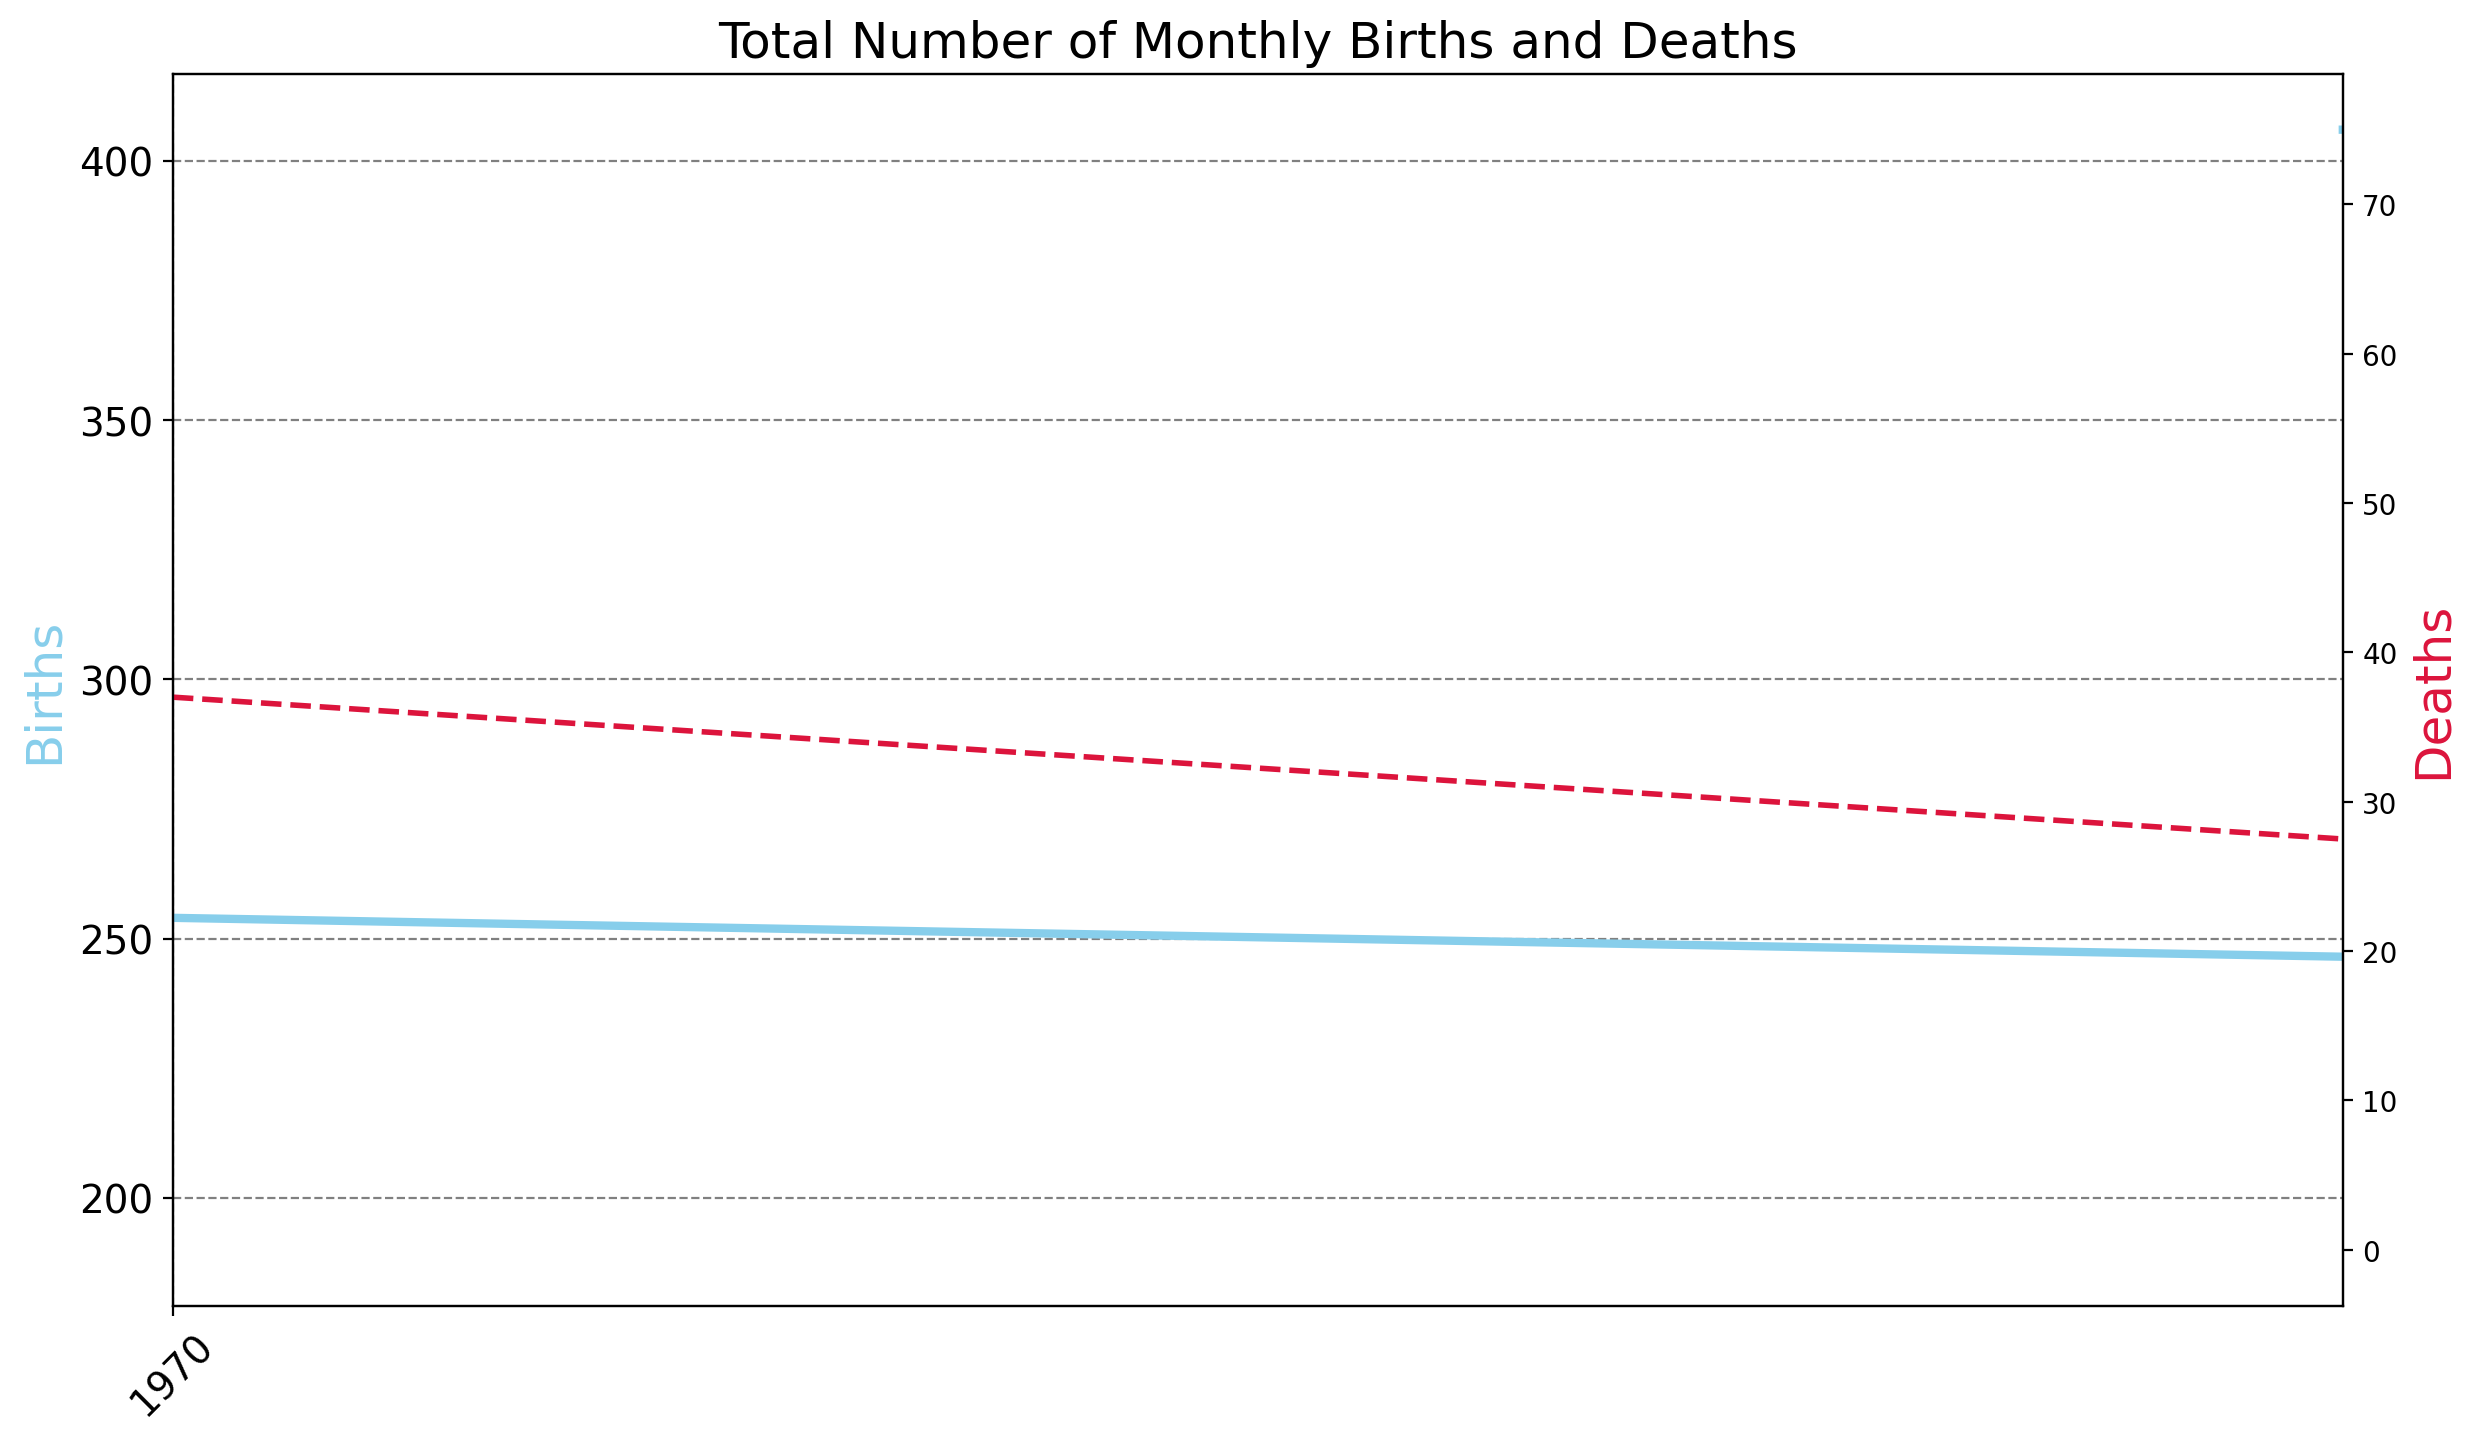

In [147]:

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 


plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

# Use Locators
ax1.set_xlim([df_data.date.min(), df_data.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_data.date, 
         df_data.births, 
         color='skyblue', 
         linewidth=3)

ax2.plot(df_data.date, 
         df_data.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')

plt.show()

In [148]:
df_year = pd.read_csv('annual_deaths_by_clinic.csv')
df_year

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [149]:
line= px.line(df_year,
             x ='year',
             y='births',
             color= 'clinic',
             title=' the number of births per clinic')
line.show()

In [150]:
line= px.line(df_year,
             x ='year',
             y='deaths',
             color= 'clinic',
             title=' the number of deaths per clinic')
line.show()

In [151]:
df_year['pct_deaths'] = df_year.deaths/df_year.births *100
df_year


clinic_1 = df_year[df_year.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

clinic_2 = df_year[df_year.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 1 is 9.92%.
Average death rate in clinic 2 is 3.88%.


In [152]:
# adding  death  percentage to monthly table
df_data['pct_deaths'] = df_data.deaths/df_data.births *100

# Converting the 'date' column to datetime objects
try:
    df_data['date'] = pd.to_datetime(df_data['date'], format='%Y-%m-%d') 

except ValueError as e:
    print(f"Error: Could not convert 'date' column to datetime. {e}")
    raise 

# Extract the year for comparison
df_data['year'] = df_data['date'].dt.year

# dividing data into two: when thy stated washing hands(after 1847) and before they startd washing hands(befor 1847)
before_washing = df_data[df_data['year'] < 1847]
after_washing = df_data[df_data['year'] >=1847]

# testing
print("Before washing:")
print(before_washing.head())
print("\nAfter washing:")
print(after_washing.head())

Before washing:
        date  births  deaths  pct_deaths  year
0 1841-01-01     254      37   14.566929  1841
1 1841-02-01     239      18    7.531381  1841
2 1841-03-01     277      12    4.332130  1841
3 1841-04-01     255       4    1.568627  1841
4 1841-05-01     255       2    0.784314  1841

After washing:
         date  births  deaths  pct_deaths  year
71 1847-01-01     311      10    3.215434  1847
72 1847-02-01     312       6    1.923077  1847
73 1847-03-01     305      11    3.606557  1847
74 1847-04-01     312      57   18.269231  1847
75 1847-05-01     294      36   12.244898  1847


In [153]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')


Average death rate before 1847 was 10.76%
Average death rate AFTER 1847 was 3.22%


In [154]:
 # work out the moving 6-month average 

roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

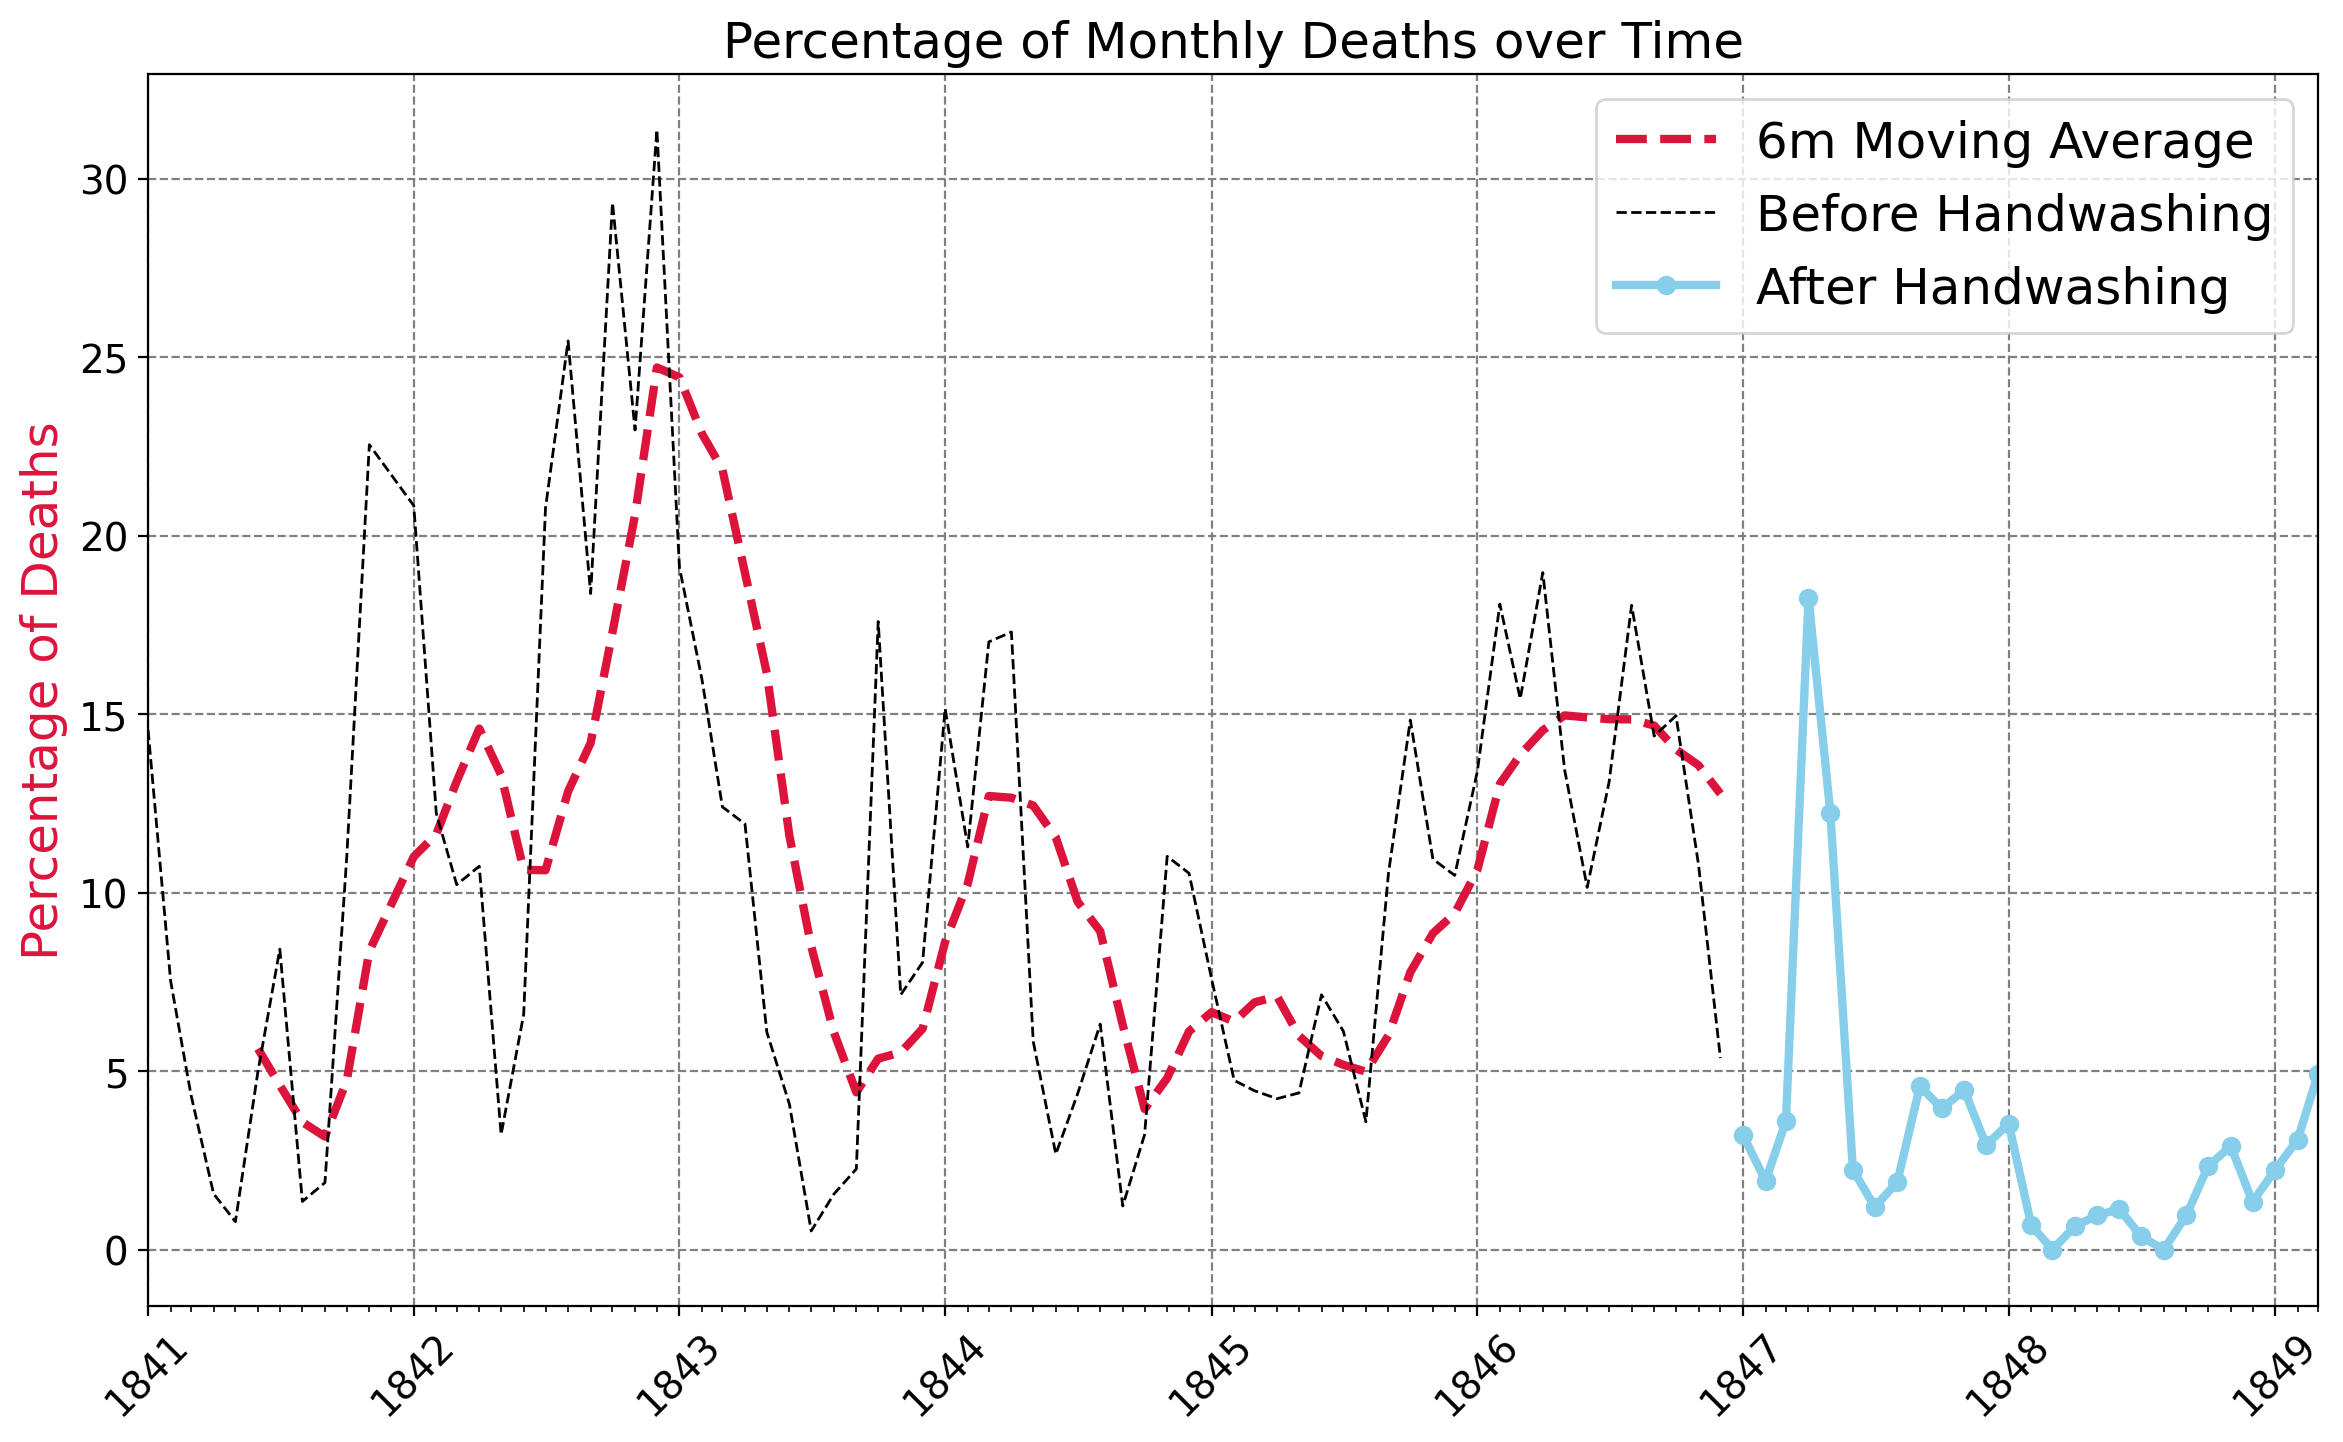

In [155]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_data.date.min(), df_data.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()


In [156]:
# difference between in the average monthly deaths
avg_prob_before = before_washing.pct_deaths.mean() 
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')

avg_prob_after = after_washing.pct_deaths.mean() 
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')


Chance of death during childbirth before handwashing: 10.7%.
Chance of death during childbirth AFTER handwashing: 3.17%.
Handwashing reduced the monthly proportion of deaths by 7.52%!
This is a 3.4x improvement!


In [157]:
 # How the Death Rate Changed Before and After Handwashing

# Converting the 'date' column to datetime objects
try:
    df_data['date'] = pd.to_datetime(df_data['date'], format='%Y-%m-%d') 

except ValueError as e:
    print(f"Error: Could not convert 'date' column to datetime. {e}")
    raise 

# Extract the year for comparison
df_data['year'] = df_data['date'].dt.year

df_data['washing_hands'] = np.where(df_data['year'] < 1847, 'No', 'Yes')
box = px.box(df_data, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',  
             title='How Have the Stats Changed with Handwashing?')

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)

box.show()

In [158]:
hist = px.histogram(df_data, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show()

C:\Users\EMMA\AppData\Local\Temp\ipykernel_8544\3161587015.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\EMMA\AppData\Local\Temp\ipykernel_8544\3161587015.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Figure size 960x720 with 0 Axes>

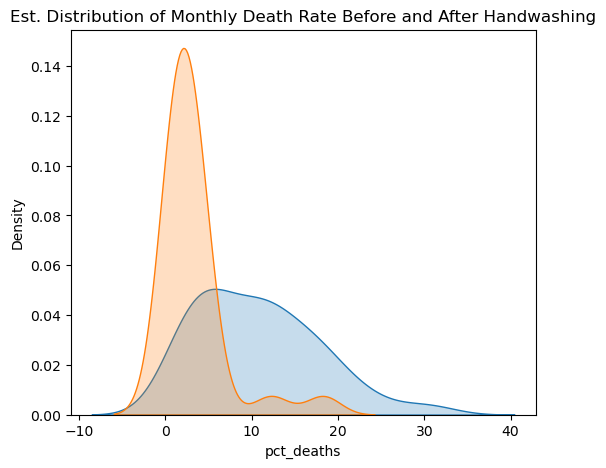

In [163]:
plt.figure(dpi=150)
plt.figure(figsize=(6,5))
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

In [160]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')


p-palue is 0.0000010362
t-statstic is 5.219
